In [1]:
import numpy as np # number processing 
import pandas as pd # data processing 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import os # directory access

# return list of files in directory 'input'
print(os.listdir('../input')) 
# load dataset
df = pd.read_csv('../input/books.csv', error_bad_lines=False) 

['books.csv']


b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [2]:
# return number of rows and columns
df.shape 

(13714, 10)

In [3]:
# check for missing values
df.count()

bookID                13714
title                 13714
authors               13714
average_rating        13714
isbn                  13714
isbn13                13714
language_code         13714
# num_pages           13714
ratings_count         13714
text_reviews_count    13714
dtype: int64

There are no missing values in the dataset.

In [4]:
# check each column's data type
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
# num_pages             int64
ratings_count           int64
text_reviews_count      int64
dtype: object

In [5]:
# summary of statistics
df.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13714.000000,13714.000000,1.371400e+04,13714.000000,1.371400e+04,13714.000000
mean,22159.859195,3.930620,9.764017e+12,342.402727,1.776540e+04,533.632128
std,13700.926816,0.357893,3.987679e+11,252.650165,1.129572e+05,2529.006691
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10619.250000,3.770000,9.780345e+12,196.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,9.780613e+12,301.000000,6.305000e+02,40.000000
75%,33311.750000,4.130000,9.780940e+12,421.000000,4.742250e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


In [6]:
# return first 5 rows
df.head() 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [7]:
# rename columns
df.rename(columns={'average_rating':'avg_rating',
                   '# num_pages':'num_pages',
                   'language_code':'lang_code'},inplace=True) 
df.columns

Index(['bookID', 'title', 'authors', 'avg_rating', 'isbn', 'isbn13',
       'lang_code', 'num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

## Analyzing Books By Language

In [8]:
# find out what and how many language codes are there
print(df['lang_code'].unique())
print('\n Total language codes:', len(df['lang_code'].unique()))

['eng' 'en-US' 'spa' 'fre' 'en-GB' 'mul' 'ger' 'ara' 'por' 'grc' 'en-CA'
 'enm' 'jpn' 'dan' 'zho' 'nl' 'ita' 'lat' 'srp' 'rus' 'tur' 'msa' 'swe'
 'glg' 'cat' 'wel' 'heb' 'nor' 'gla' 'ale']

 Total language codes: 30


Text(0.5, 0, 'Number of Books')

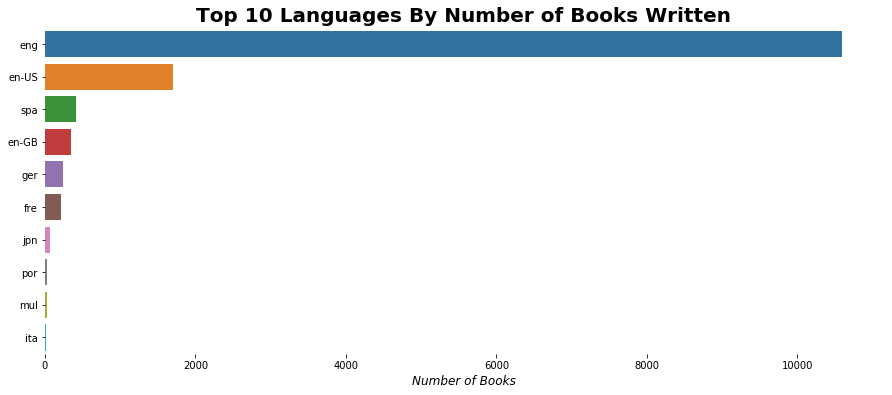

In [9]:
# top 10 languages for books
langs = df['lang_code'].value_counts().head(10)
plt.figure(figsize=(15,6))
sns.barplot(x=langs, y=langs.index) # horizontal bar plot
sns.despine() # remove line to the top and right of chart
sns.despine(left=True, bottom=True) # remove line to the bottom and left of chart
plt.title('Top 10 Languages By Number of Books Written', fontsize=20, fontweight='bold')
plt.xlabel('Number of Books', fontsize=12, fontstyle='italic') 

Unsurprisingly, English is the most common language books are written in. The different variants of English, such as American English and British English, are treated as separate language categories. To get a better idea of how dominant the English language is, we'll combine all the different variants into one.

(-1.2199998115274926,
 1.1127149840344506,
 -1.1100472747955759,
 1.1071606823815054)

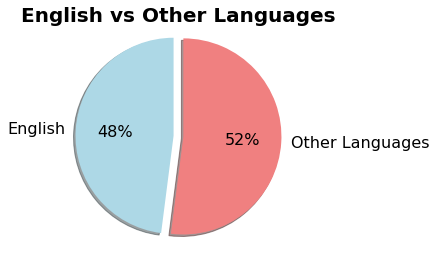

In [10]:
# books written in all variants of English
eng_books = df[(df['lang_code'] == 'eng') | (df['lang_code'] == 'en-US') | (df['lang_code'] == 'en-GB') 
               | (df['lang_code'] == 'en-CA')]

# plot a pie chart to show the percentage of English books out of all total books
sizes = [eng_books.shape[0], df.shape[0]] 
labels = ['English', 'Other Languages']
colors = ['lightblue', 'lightcoral']
explode=(0.1, 0) # explode the first slice of the pie
plt.pie(sizes, labels=labels, colors=colors, explode=explode, textprops=dict(fontsize=16), autopct='%1.0f%%', shadow=True, startangle=90)
plt.title('English vs Other Languages', fontsize=20, fontweight='bold')
plt.axis('equal')

From the pie chart we can see that books written in English (any variant) comprise 48% of the total.

## Analyzing Books By Rating

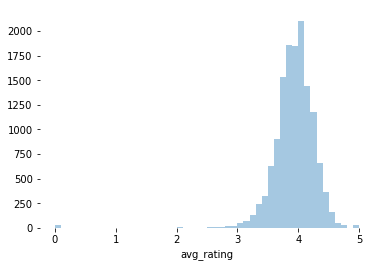

In [11]:
# plot books against average rating
sns.distplot(a=df['avg_rating'], kde=False)
sns.despine()
sns.despine(left=True, bottom=True)

The majority of books appear to have average ratings between 3.5 to 4.5, which would seem to indicate favourable quality overall. However, the above histogram does not yet factor in the number of ratings and text reviews, which are far more telling indicators of a book's true quality. 

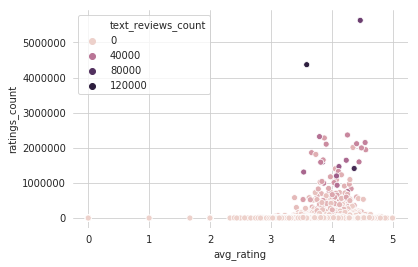

In [12]:
# correlation between average rating, ratings count, and text reviews count
sns.set_style('whitegrid')
sns.scatterplot(x=df['avg_rating'], y=df['ratings_count'], hue=df['text_reviews_count'])
sns.despine()
sns.despine(left=True, bottom=True)

The scatterplot reveals that some books which, despite not having been rated yet, have an average rating higher than zero. This points to inaccuracies in the dataset. There is still a large proportion of books with a ratings count that is at least in the hundreds, and the average rating for these fall within the 3.5 to 4.5 range, which bodes well for overall quality. Books with higher ratings count tend to have more text reviews; this makes sense as the more readers a books has, the larger the pool of potential raters and reviewers. 

Two outliers can be detected immediately in the plot; both have a ratings count of above 4 million, while the next closest ratings count are around the 2.5 million mark.

In [13]:
# find outliers
df[df['ratings_count'] > 4000000]

,bookID,title,authors,avg_rating,isbn,isbn13,lang_code,num_pages,ratings_count,text_reviews_count
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
12243,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,498,4367341,93619


Both outliers turn out to be titles from phenomenally bestselling series, so that accounts for the high readership. It is noteworthy that both books also happen to be the first instalment in their respective series, with none of their sequels coming close in terms of readership numbers. It is possible that the hype surrounding the series led people to read the first book before deciding they didn't find it engaging enough to continue on to the second. A second hypothesis is that the sequels are not included in the dataset. 

In [14]:
# find Twilight sequels
df[df['authors'] == 'Stephenie Meyer'].sort_values(['ratings_count', 'text_reviews_count'], ascending=False)

,bookID,title,authors,avg_rating,isbn,isbn13,lang_code,num_pages,ratings_count,text_reviews_count
12243,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,498,4367341,93619
3938,12024,Twilight (Twilight #1),Stephenie Meyer,3.59,031605898X,9780316058988,eng,544,2392,544


With the Twilight series, it is the second hypothesis that holds true.

In [15]:
# find Harry Potter sequels
df[(df['authors'] == 'J.K. Rowling-Mary GrandPré') | 
   (df['authors'] == 'J.K. Rowling')].sort_values(['ratings_count', 'text_reviews_count'], ascending=False)

,bookID,title,authors,avg_rating,isbn,isbn13,lang_code,num_pages,ratings_count,text_reviews_count
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964
5300,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling-Mary GrandPré,4.41,0439064864,9780439064866,eng,341,2115562,32694
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,38872,154
7,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,27410,820
12663,43509,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,4.55,074754624X,9780747546245,eng,636,18097,860
693,2002,Harry Potter Schoolbooks Box Set: Two Classic ...,J.K. Rowling,4.40,043932162X,9780439321624,eng,240,11459,143
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272


With the Harry Potter series, the first hypothesis seems more likely, especially given that the difference in rating counts between the two most rated books is a startling 3.5 million. 